In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [12]:
devclubDf=pd.read_csv("../csv/all/data-devclub.csv")
devclubDf.columns

Index(['EMP_ID', 'PASSPORT', 'FIRSTNAME', 'LASTNAME', 'GENDER', 'BIRTHDAY',
       'NATIONALITY', 'HIRED', 'DEPT', 'POSITION', 'STATUS', 'REGION'],
      dtype='object')

In [13]:
devclubDf

,EMP_ID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION
0,3,JUI65YBK7AF,Jada,Bender,0,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada
1,5,AZE20CSG4MU,Lillian,Reese,0,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada
2,23,NFH65BYM0VB,Armand,Horn,0,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia
3,29,CMK62UAD3VK,Rowan,Leonard,1,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia
4,33,EWD45RJW5YK,Carter,Velasquez,0,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC
5,34,BFS82MEY3CX,Selma,Bush,0,26-03-1972,Italy,10-10-2008,Flight Attendance,Airhostess,1,USA
6,50,MRC33GHJ2KW,Calvin,Roach,1,16-04-1999,Mexico,18-03-2011,Flight Attendance,Steward,1,Europe
7,66,WKV12UQC6QF,Zachery,Valentine,0,04-06-1971,Philippines,25-08-2011,Flight Attendance,Steward,1,Middle East
8,80,EUC74ENE9ZK,Ryan,Rush,0,13-06-1998,Italy,31-07-2019,Aircraft Maintenance,Pilot,1,Middle East
9,93,UXL43IOW6OV,Honorato,Maxwell,1,09-03-1982,France,04-02-2017,Aircraft Maintenance,Airhostess,1,Europe


In [22]:
devclubDf.tail()
devclubDf.groupby(["REGION"])["FIRSTNAME"].count()

REGION
APAC           1
Canada         3
Europe         3
Middle East    2
Ocenia         2
USA            1
Name: FIRSTNAME, dtype: int64

<AxesSubplot: ylabel='People'>

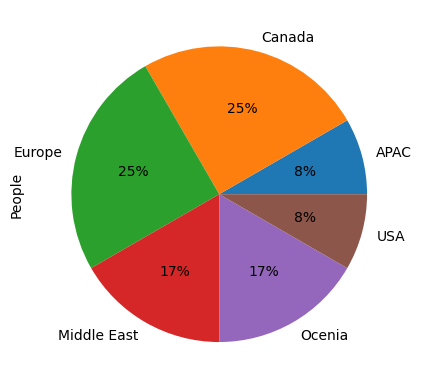

In [89]:
devclubDf.groupby(["REGION"])["FIRSTNAME"].count().plot.pie(ylabel='People',autopct='%1.0f%%')

In [29]:
devclubDf.groupby(["REGION","DEPT","POSITION"])["EMP_ID"].count()

REGION       DEPT                  POSITION  
APAC         Flight Planning       Pilot         1
Canada       Flight Attendance     Airhostess    1
             Flight Planning       Steward       1
             Pilot                 Pilot         1
Europe       Aircraft Maintenance  Airhostess    1
             Flight Attendance     Steward       1
             Pilot                 Pilot         1
Middle East  Aircraft Maintenance  Pilot         1
             Flight Attendance     Steward       1
Ocenia       Aircraft Maintenance  Airhostess    1
                                   Pilot         1
USA          Flight Attendance     Airhostess    1
Name: EMP_ID, dtype: int64

<AxesSubplot: xlabel='NATIONALITY', ylabel='People'>

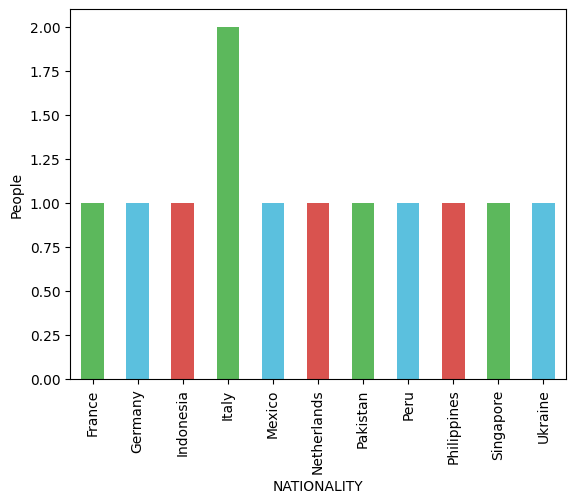

In [45]:
devclubDf.groupby(["NATIONALITY"])["EMP_ID"].count().plot.bar(ylabel='People',color=['#5cb85c','#5bc0de','#d9534f'])

In [76]:
devclubDf["BIRTHDAY"]= pd.to_datetime(devclubDf["BIRTHDAY"])
devclubDf["HIRED"]= pd.to_datetime(devclubDf["HIRED"])
devclubDf["TODAY"] = pd.to_datetime("today")
devclubDf["AGE"]=((devclubDf["TODAY"]-devclubDf["BIRTHDAY"])/ np.timedelta64(1, 'Y')).apply(np.floor)
devclubDf["EXP"]=((devclubDf["TODAY"]-devclubDf["HIRED"])/ np.timedelta64(1, 'Y')).apply(np.floor)
devclubDf

,EMP_ID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION,TODAY,AGE,EXP
0,3,JUI65YBK7AF,Jada,Bender,0,1963-05-28,Pakistan,2001-11-02,Pilot,Pilot,1,Canada,2022-10-09 17:09:57.241512,59.0,20.0
1,5,AZE20CSG4MU,Lillian,Reese,0,1982-03-12,Ukraine,2002-05-19,Flight Planning,Steward,1,Canada,2022-10-09 17:09:57.241512,40.0,20.0
2,23,NFH65BYM0VB,Armand,Horn,0,1987-05-24,Netherlands,2007-06-19,Aircraft Maintenance,Airhostess,1,Ocenia,2022-10-09 17:09:57.241512,35.0,15.0
3,29,CMK62UAD3VK,Rowan,Leonard,1,1974-07-15,Germany,2004-03-27,Aircraft Maintenance,Pilot,1,Ocenia,2022-10-09 17:09:57.241512,48.0,18.0
4,33,EWD45RJW5YK,Carter,Velasquez,0,1967-11-23,Indonesia,2005-02-27,Flight Planning,Pilot,1,APAC,2022-10-09 17:09:57.241512,54.0,17.0
5,34,BFS82MEY3CX,Selma,Bush,0,1972-03-26,Italy,2008-10-10,Flight Attendance,Airhostess,1,USA,2022-10-09 17:09:57.241512,50.0,13.0
6,50,MRC33GHJ2KW,Calvin,Roach,1,1999-04-16,Mexico,2011-03-18,Flight Attendance,Steward,1,Europe,2022-10-09 17:09:57.241512,23.0,11.0
7,66,WKV12UQC6QF,Zachery,Valentine,0,1971-04-06,Philippines,2011-08-25,Flight Attendance,Steward,1,Middle East,2022-10-09 17:09:57.241512,51.0,11.0
8,80,EUC74ENE9ZK,Ryan,Rush,0,1998-06-13,Italy,2019-07-31,Aircraft Maintenance,Pilot,1,Middle East,2022-10-09 17:09:57.241512,24.0,3.0
9,93,UXL43IOW6OV,Honorato,Maxwell,1,1982-09-03,France,2017-04-02,Aircraft Maintenance,Airhostess,1,Europe,2022-10-09 17:09:57.241512,40.0,5.0


In [72]:
devclubDf.groupby(["REGION"]).agg({'AGE':['mean','min','max']})

AGE            
                  mean   min   max
REGION                            
APAC         54.000000  54.0  54.0
Canada       41.666667  26.0  59.0
Europe       28.333333  22.0  40.0
Middle East  37.500000  24.0  51.0
Ocenia       41.500000  35.0  48.0
USA          50.000000  50.0  50.0

<AxesSubplot: title={'center': 'Age'}, xlabel='Region', ylabel='Age'>

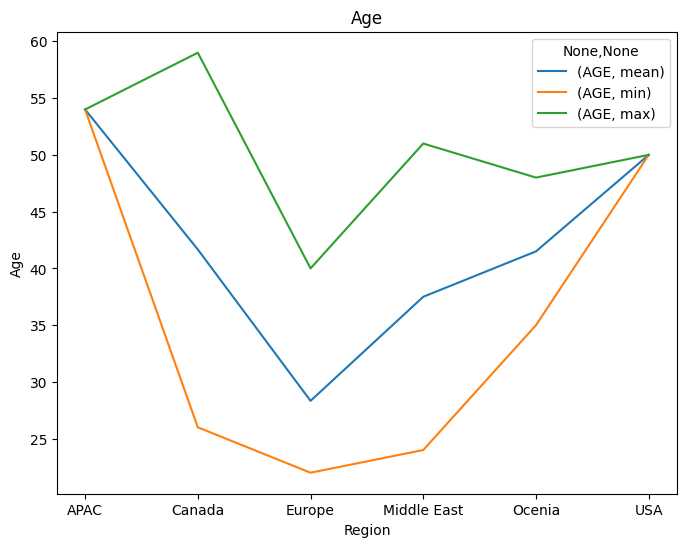

In [74]:
devclubDf.groupby(["REGION"]).agg({'AGE':['mean','min','max']}).plot(kind='line', figsize=(8, 6), title='Age', xlabel='Region', ylabel='Age', rot=0)

In [84]:
bins= [0,31,45,110]
labels = ['Gen-Y','Gen-X','ฺBabyBoomer']
devclubDf['AGE_GROUP'] = pd.cut(devclubDf['AGE'], bins=bins, labels=labels, right=False)
devclubDf


,EMP_ID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION,TODAY,AGE,EXP,AGE_GROUP
0,3,JUI65YBK7AF,Jada,Bender,0,1963-05-28,Pakistan,2001-11-02,Pilot,Pilot,1,Canada,2022-10-09 17:09:57.241512,59.0,20.0,ฺBabyBoomer
1,5,AZE20CSG4MU,Lillian,Reese,0,1982-03-12,Ukraine,2002-05-19,Flight Planning,Steward,1,Canada,2022-10-09 17:09:57.241512,40.0,20.0,Gen-X
2,23,NFH65BYM0VB,Armand,Horn,0,1987-05-24,Netherlands,2007-06-19,Aircraft Maintenance,Airhostess,1,Ocenia,2022-10-09 17:09:57.241512,35.0,15.0,Gen-X
3,29,CMK62UAD3VK,Rowan,Leonard,1,1974-07-15,Germany,2004-03-27,Aircraft Maintenance,Pilot,1,Ocenia,2022-10-09 17:09:57.241512,48.0,18.0,ฺBabyBoomer
4,33,EWD45RJW5YK,Carter,Velasquez,0,1967-11-23,Indonesia,2005-02-27,Flight Planning,Pilot,1,APAC,2022-10-09 17:09:57.241512,54.0,17.0,ฺBabyBoomer
5,34,BFS82MEY3CX,Selma,Bush,0,1972-03-26,Italy,2008-10-10,Flight Attendance,Airhostess,1,USA,2022-10-09 17:09:57.241512,50.0,13.0,ฺBabyBoomer
6,50,MRC33GHJ2KW,Calvin,Roach,1,1999-04-16,Mexico,2011-03-18,Flight Attendance,Steward,1,Europe,2022-10-09 17:09:57.241512,23.0,11.0,Gen-Y
7,66,WKV12UQC6QF,Zachery,Valentine,0,1971-04-06,Philippines,2011-08-25,Flight Attendance,Steward,1,Middle East,2022-10-09 17:09:57.241512,51.0,11.0,ฺBabyBoomer
8,80,EUC74ENE9ZK,Ryan,Rush,0,1998-06-13,Italy,2019-07-31,Aircraft Maintenance,Pilot,1,Middle East,2022-10-09 17:09:57.241512,24.0,3.0,Gen-Y
9,93,UXL43IOW6OV,Honorato,Maxwell,1,1982-09-03,France,2017-04-02,Aircraft Maintenance,Airhostess,1,Europe,2022-10-09 17:09:57.241512,40.0,5.0,Gen-X


<AxesSubplot: >

/Users/supachoke/hackathon-season2/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3642 (\N{THAI CHARACTER PHINTHU}) missing from current font.
  func(*args, **kwargs)
/Users/supachoke/hackathon-season2/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3642 (\N{THAI CHARACTER PHINTHU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


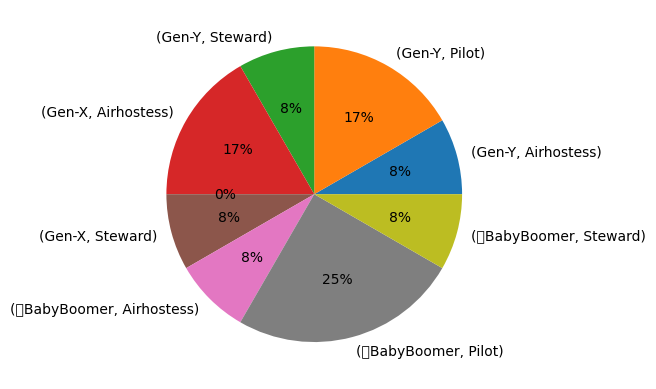

In [88]:
devclubDf.groupby(["AGE_GROUP","POSITION"])['POSITION'].agg('count').plot.pie(ylabel='',autopct='%1.0f%%')